In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\gowri\AppData\Local\Temp\ipykernel_16076\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df= pd.read_csv('salesmonthly.csv')
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [3]:
df.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571
std,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000
50%,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000
75%,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   70 non-null     object 
 1   M01AB   70 non-null     float64
 2   M01AE   70 non-null     float64
 3   N02BA   70 non-null     float64
 4   N02BE   70 non-null     float64
 5   N05B    70 non-null     float64
 6   N05C    70 non-null     float64
 7   R03     70 non-null     float64
 8   R06     70 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.1+ KB


In [5]:
df.shape

(70, 9)

In [6]:
df.isna().sum()

datum    0
M01AB    0
M01AE    0
N02BA    0
N02BE    0
N05B     0
N05C     0
R03      0
R06      0
dtype: int64

## Data Preprocessing

In [7]:
df['datum'] = pd.to_datetime(df['datum']) ##converting to date-time format
df['Year'] = df['datum'].dt.year
df['Month'] = df['datum'].dt.month
df=df.drop('datum',axis=1)
cols = ['Year', 'Month'] + [col for col in df.columns if col not in ['Year', 'Month']]  ##shifting positions of year and month columns 
df=df[cols]
df.head()

,Year,Month,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014,1,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014,2,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014,3,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014,4,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014,5,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


<Axes: >

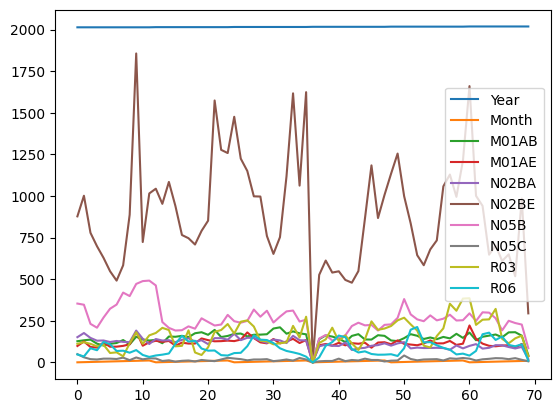

In [28]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(df.iloc[:, :])
#new_df= pd.DataFrame(scaled_features,columns=df.columns)
#new_df.head()
df.plot()

## Model training

In [8]:
X= df.iloc[:,0:2].values
y= df.iloc[:,2:].values
print(X)

[[2014    1]
 [2014    2]
 [2014    3]
 [2014    4]
 [2014    5]
 [2014    6]
 [2014    7]
 [2014    8]
 [2014    9]
 [2014   10]
 [2014   11]
 [2014   12]
 [2015    1]
 [2015    2]
 [2015    3]
 [2015    4]
 [2015    5]
 [2015    6]
 [2015    7]
 [2015    8]
 [2015    9]
 [2015   10]
 [2015   11]
 [2015   12]
 [2016    1]
 [2016    2]
 [2016    3]
 [2016    4]
 [2016    5]
 [2016    6]
 [2016    7]
 [2016    8]
 [2016    9]
 [2016   10]
 [2016   11]
 [2016   12]
 [2017    1]
 [2017    2]
 [2017    3]
 [2017    4]
 [2017    5]
 [2017    6]
 [2017    7]
 [2017    8]
 [2017    9]
 [2017   10]
 [2017   11]
 [2017   12]
 [2018    1]
 [2018    2]
 [2018    3]
 [2018    4]
 [2018    5]
 [2018    6]
 [2018    7]
 [2018    8]
 [2018    9]
 [2018   10]
 [2018   11]
 [2018   12]
 [2019    1]
 [2019    2]
 [2019    3]
 [2019    4]
 [2019    5]
 [2019    6]
 [2019    7]
 [2019    8]
 [2019    9]
 [2019   10]]


In [9]:
print(y)

[[1.276900e+02 9.909000e+01 1.521000e+02 8.780300e+02 3.540000e+02
  5.000000e+01 1.120000e+02 4.820000e+01]
 [1.333200e+02 1.260500e+02 1.770000e+02 1.001900e+03 3.470000e+02
  3.100000e+01 1.220000e+02 3.620000e+01]
 [1.374400e+02 9.295000e+01 1.476550e+02 7.792750e+02 2.320000e+02
  2.000000e+01 1.120000e+02 8.540000e+01]
 [1.131000e+02 8.947500e+01 1.309000e+02 6.985000e+02 2.090000e+02
  1.800000e+01 9.700000e+01 7.370000e+01]
 [1.017900e+02 1.199330e+02 1.321000e+02 6.287800e+02 2.700000e+02
  2.300000e+01 1.070000e+02 1.237000e+02]
 [1.120700e+02 9.471000e+01 1.229000e+02 5.482250e+02 3.230000e+02
  2.300000e+01 5.700000e+01 1.093000e+02]
 [1.170600e+02 9.501000e+01 1.293000e+02 4.919000e+02 3.480000e+02
  2.100000e+01 6.100000e+01 6.910000e+01]
 [1.347900e+02 9.978000e+01 1.238000e+02 5.838500e+02 4.200000e+02
  2.900000e+01 3.700000e+01 7.080000e+01]
 [1.087800e+02 1.090940e+02 1.221000e+02 8.878200e+02 3.990000e+02
  1.400000e+01 1.150000e+02 5.880000e+01]
 [1.547500e+02 1.85

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def BestModel(x,y):
      x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
      scaler = StandardScaler()
      x_train= scaler.fit_transform(x_train)
      x_test=scaler.transform(x_test)
      
      poly= PolynomialFeatures(degree=5)
      x_poly= poly.fit_transform(x_train)
      x_test_poly= poly.transform(x_test)
      polyreg= LinearRegression()
      polyreg.fit(x_poly,y_train)
      poly_score= r2_score(y_test,polyreg.predict(x_test_poly))
      
      models= {
      "linearRegression" : LinearRegression(),
      "RandomForest" : RandomForestRegressor(n_estimators=200,random_state=42),
      "SVM": SVR(),
      "SVR (Linear Kernel)": SVR(kernel='linear'),
      'SVR (Polynomial Kernel)': SVR(kernel='poly', degree=2),
      'XGBoost': XGBRegressor(n_estimators=1000, random_state=42)
      }
      
      best_model= None
      best_r2= -float('inf')
      model_name= ""
      for key,data in models.items():
         data.fit(x_train,y_train)
         y_pred= data.predict(x_test)
         score= r2_score(y_test,y_pred)
         if score> best_r2:
             best_r2= score
             best_model= data
             model_name= key

      if poly_score>best_r2:
          best_r2= poly_score
          best_model= polyreg
          model_name= "PolynomialRegression"

      return best_r2,best_model,model_name

In [27]:
models= []
categories = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
for i in range(0,8):
    best_r2,best_model,model_name= BestModel(X,y[:,i])
    print("Best model for ", categories[i]," is ",model_name," with R2 score ", best_r2 *100)
    models.append(best_model)

Best model for  M01AB  is  XGBoost  with R2 score  87.05694489736189
Best model for  M01AE  is  SVR (Linear Kernel)  with R2 score  2.980965809113434
Best model for  N02BA  is  linearRegression  with R2 score  37.70453215630777
Best model for  N02BE  is  XGBoost  with R2 score  58.73559011511523
Best model for  N05B  is  XGBoost  with R2 score  52.37462617157816
Best model for  N05C  is  PolynomialRegression  with R2 score  72.68744805402288
Best model for  R03  is  RandomForest  with R2 score  60.26410981573158
Best model for  R06  is  RandomForest  with R2 score  80.44372344602681
